#Programming Language Analysis

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df= pd.read_csv("QueryResults.csv", names=['DATE', 'TAG', 'POSTS'], header=0)

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [4]:
df.shape

(2496, 3)

In [5]:
df.count()

DATE     2496
TAG      2496
POSTS    2496
dtype: int64

In [6]:
df.groupby("TAG").sum()

<ipython-input-6-a2cc2c872c1d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("TAG").sum()


,POSTS
TAG,
assembly,43073
c,398010
c#,1597574
c++,796867
delphi,51104
go,70085
java,1902173
javascript,2504120
perl,67759


In [7]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,180,180
c,180,180
c#,181,181
c++,180,180
delphi,180,180
go,165,165
java,180,180
javascript,180,180
perl,180,180


Languages like go, swift are new as compared to c or java

In [8]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


In [9]:
reshaped_df = df.pivot('DATE', 'TAG', 'POSTS')
reshaped_df
reshaped_df.shape

<ipython-input-9-b6ac8d965a6e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  reshaped_df = df.pivot('DATE', 'TAG', 'POSTS')


(181, 14)

In [10]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [11]:
reshaped_df.count()

TAG
assembly      180
c             180
c#            181
c++           180
delphi        180
go            165
java          180
javascript    180
perl          180
php           180
python        180
r             178
ruby          180
swift         172
dtype: int64

In [12]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,956.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0


In [13]:
reshaped_df.isna().values.any()

False

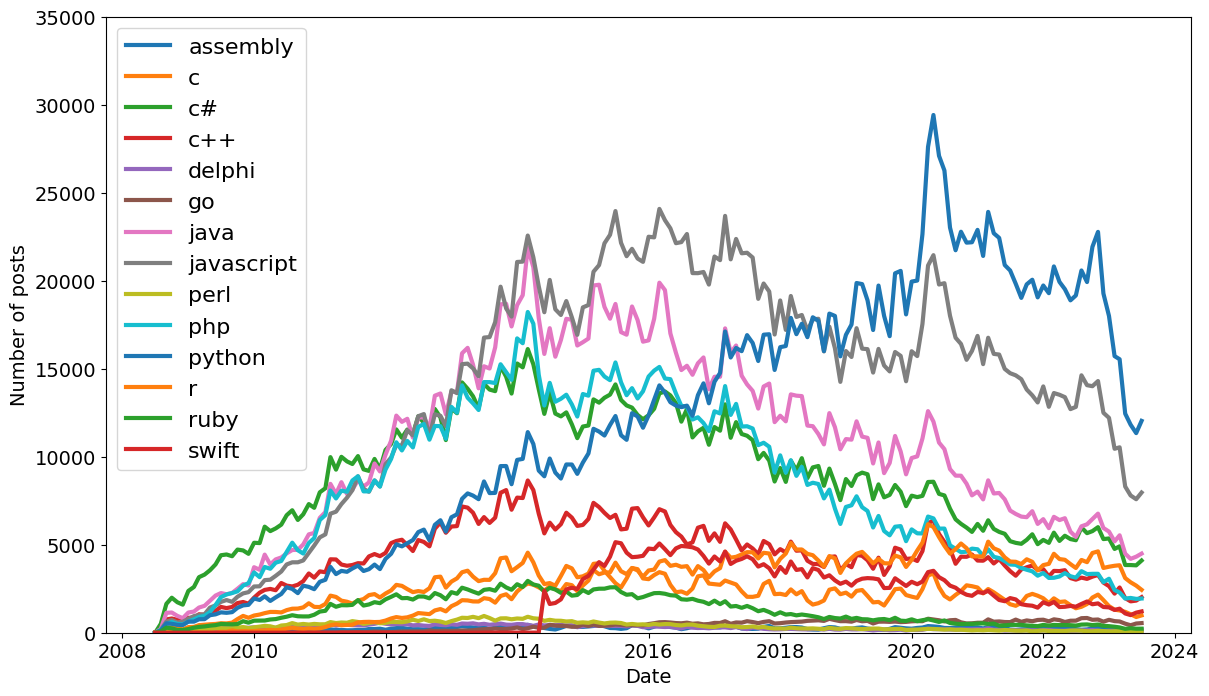

In [14]:
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
plt.ylim(0, 35000)

# for column in reshaped_df.columns:
#   plt.plot(reshaped_df.index, reshaped_df[column])

plt.plot(reshaped_df.index, reshaped_df, linewidth=3, label=reshaped_df.columns)
plt.legend(fontsize=16)

In [15]:
roll_df = reshaped_df.rolling(window=3).mean()

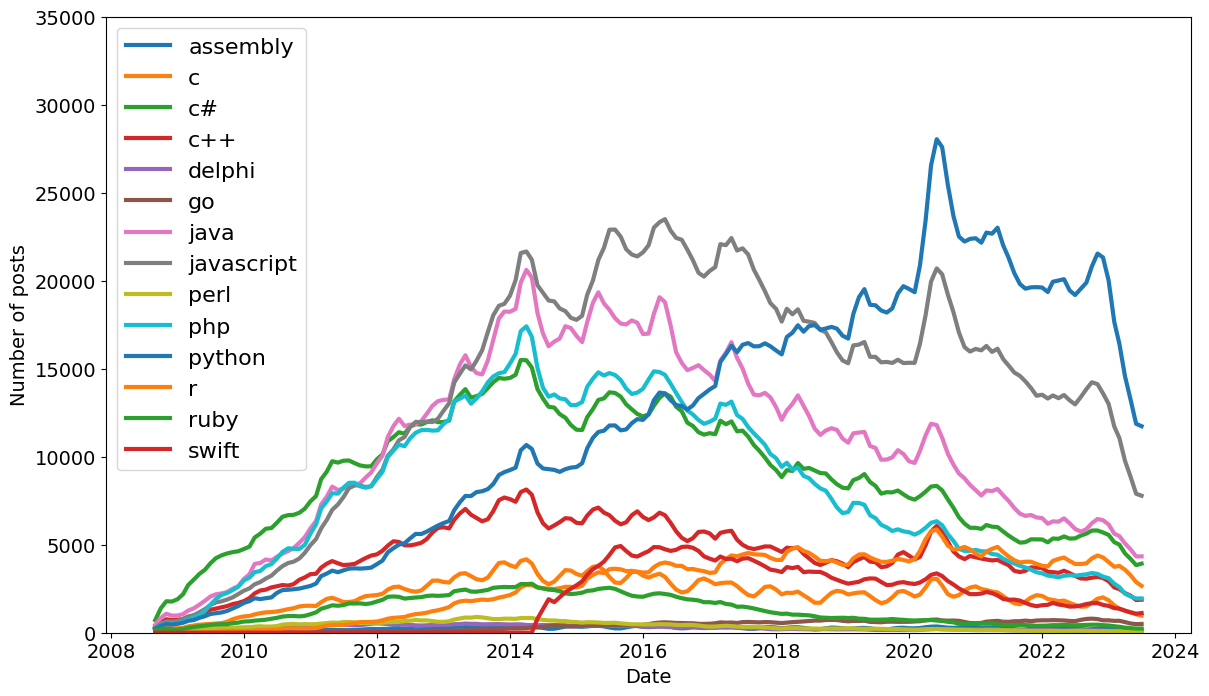

In [16]:
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(roll_df.index, roll_df, linewidth=3, label=roll_df.columns)
plt.legend(fontsize=16)